In [1]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [4]:
#rdir = '/workspace'
rdir = '../'

dat_files = natsort(glob2.glob(rdir + '/results/A/**/*.dat'))


len(dat_files)
#dat_files

1

In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [12]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [20]:
dat_files[0]

'..//results/A/7/results_modelA_7.dat'

In [22]:
df = pd.read_csv(dat_files[0], sep="\s*", header=None,  index_col=False)
df.columns = columns3 
#df

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [8]:
data = []
realtime = []
gooddata = []
area = []
col = 'rmsSurfScaled'

for i in dat_files[:-1]:
    print(i)
    
    try:
        df = pd.read_csv(i, sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        area.append(df['areaintRock'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

In [9]:
#data

In [24]:



columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

#df = pd.read_csv(dat_files[4], sep="\s*", header=None,  index_col=False)
df = pd.read_csv('../results/A/7/results_modelA_7.dat', sep="\s*", header=None,  index_col=False)

df.columns = columns3

df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


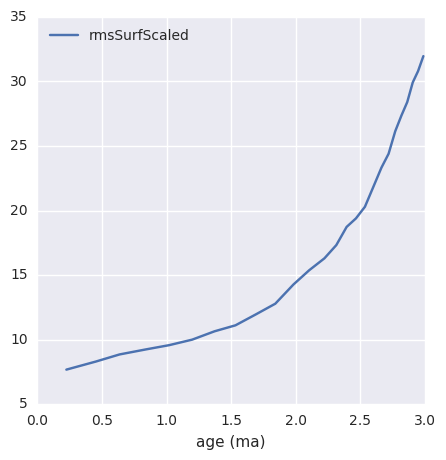

In [27]:

fig, ax = plt.subplots(figsize=(5,5))

for i in range(0, realtime.shape[0]):
    #c = inv_map[params[i][1]]
    #if params[i][1] >= 1.:
    ax.plot(realtime[i], data[i]/3.4,label=(str(i+1)) )

plt.plot(df['realtimeScaled'] , df['rmsSurfScaled'] )
    
#ax.set_xlim(1., 200.)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)
#ax.set_title('hmm')
#ax.set_ylabel('RMS surface velocity (cm/y)')
ax.set_xlabel('age (ma)')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.axhline(1., c='k', ls='--')

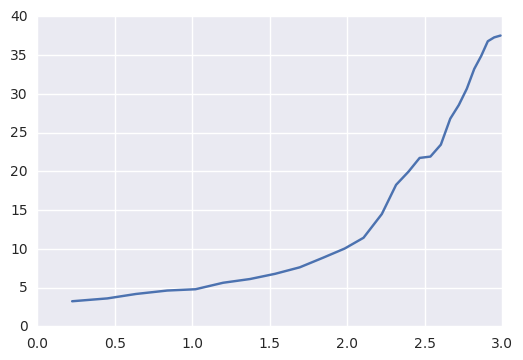

In [26]:
plt.plot(df['realtimeScaled'] , (df['maxVxsurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365) )

In [25]:
(df['surfLength'])

0     3.4
1     3.4
2     3.4
3     3.4
4     3.4
5     3.4
6     3.4
7     3.4
8     3.4
9     3.4
10    3.4
11    3.4
12    3.4
13    3.4
14    3.4
15    3.4
16    3.4
17    3.4
18    3.4
19    3.4
20    3.4
21    3.4
22    3.4
23    3.4
24    3.4
25    3.4
26    3.4
27    3.4
28    3.4
29    3.4
30    3.4
31    3.4
32    3.4
33    3.4
34    3.4
35    3.4
36    3.4
37    3.4
38    3.4
39    3.4
40    3.4
41    3.4
42    3.4
Name: surfLength, dtype: float64

In [26]:
#df['maxVel']

In [27]:
df['realtimeScaled'] 

0     0.181514
1     0.388579
2     0.588025
3     0.787289
4     0.995542
5     1.188286
6     1.373493
7     1.549015
8     1.714099
9     1.868187
10    2.000000
11    2.134019
12    2.257502
13    2.378653
14    2.483803
15    2.577837
16    2.665804
17    2.740083
18    2.812469
19    2.880404
20    2.937276
21    2.989183
22    3.038081
23    3.091367
24    3.137709
25    3.179444
26    3.218369
27    3.257064
28    3.295477
29    3.332341
30    3.366610
31    3.398812
32    3.430673
33    3.461504
34    3.491744
35    3.520944
36    3.549728
37    3.576233
38    3.602023
39    3.627970
40    3.653951
41    3.678927
42    3.702561
Name: realtimeScaled, dtype: float64